<a href="https://colab.research.google.com/github/LUCASDNORONHA/TwitterTextClassification-NLP/blob/main/TwitterTextClassification_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação de Textos do Twitter**

O objetivo será desenvolver um modelo que seja capaz de classificar os sentimentos dos usuários do Twitter com base em seus tweets. Iremos treinar o modelo com 800 mil tweets em português separados em classes positivas, negativas e neutras.

### **Sobre os dados:**

Este conjunto de dados consiste em tweets em português categorizados em classes positivas, negativas e neutras para a classificação da polaridade do sentimento.

Os tweets nos conjuntos de dados foram coletados principalmente do Twitter no período de 01/08/2018 a 20/10/2018.

- **Fonte:** https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis#TweetsNeutralHash.csv

In [1]:
!pip install spacy

In [2]:
import spacy

In [3]:
!python -m spacy download pt_core_news_sm

2023-11-18 17:39:39.472310: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-18 17:39:39.472411: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-18 17:39:39.472459: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-18 17:39:40.915345: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 82.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [4]:
import pandas as pd
import string
import spacy
import en_core_web_sm
import random
import seaborn as sns
import numpy as np
import re

# Carregando Base de Dados


### Base de Treinamento

Negative: 0

Positive: 1




In [5]:
base_treinamento = pd.read_csv('/content/Train50.csv', delimiter=';')

In [6]:
base_treinamento.shape

(50000, 5)

In [7]:
base_treinamento.sample(5)

,id,tweet_text,tweet_date,sentiment,query_used
8351,1049120167106686976,"@coffesehun eu espero também, e eu tudo isso u...",Mon Oct 08 02:11:54 +0000 2018,1,:)
31539,1049237084471525377,Acordei e não é tudo um pesadelo :(,Mon Oct 08 09:56:29 +0000 2018,0,:(
27200,1049304126247657472,@BiaFreitas12 @ThaisM256 + mas com muito medo ...,Mon Oct 08 14:22:53 +0000 2018,0,:(
21168,1046771738770591744,esqueci de relatar nesse site que vi o Math on...,Mon Oct 01 14:40:05 +0000 2018,1,:)
31558,1049236597487652864,@jpg_untitled Sushi sim!!! Só as meias eq não :(,Mon Oct 08 09:54:33 +0000 2018,0,:(


In [10]:
base_treinamento['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

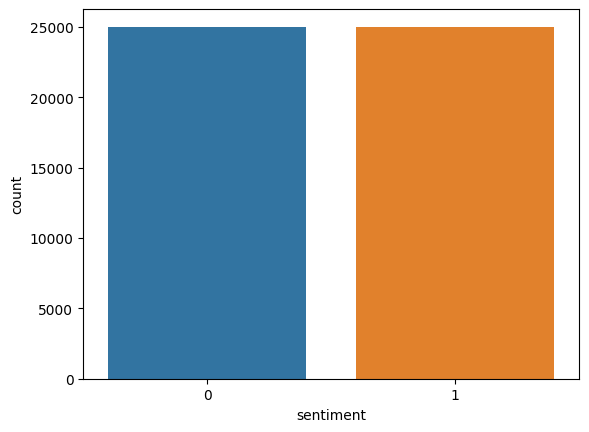

In [13]:
values_counts = base_treinamento['sentiment'].value_counts()

sns.countplot(x = 'sentiment', data=base_treinamento);

In [14]:
base_treinamento.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [15]:
base_treinamento.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


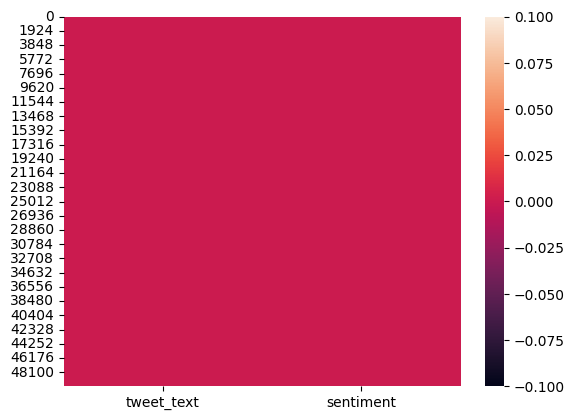

In [16]:
sns.heatmap(pd.isnull(base_treinamento));

### Base de Teste

In [17]:
base_teste = pd.read_csv('/content/Test.csv', delimiter=';')

In [18]:
base_teste.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [19]:
base_teste.shape

(5000, 5)

In [20]:
base_teste.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [21]:
base_teste.head()

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1


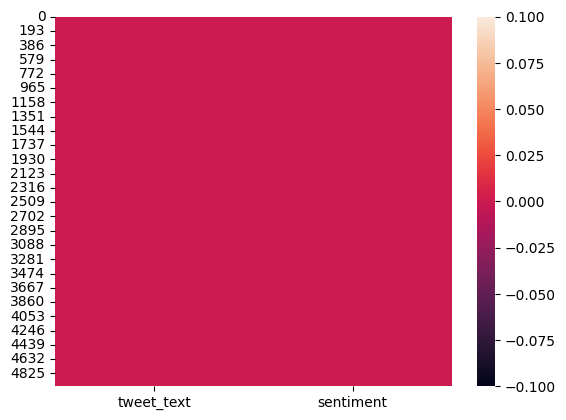

In [22]:
sns.heatmap(pd.isnull(base_teste));

# Funções: Pré-Processamento de Textos

- Letras minúsculas

- Nome do usuário (@)

- URLs

- Espaços em branco

- Emoticons

- Stop words

- Lematização

- Pontuações

In [23]:
pln = en_core_web_sm.load()
pln

In [24]:
from spacy.lang.pt.stop_words import STOP_WORDS

In [25]:
stop_words = STOP_WORDS

In [26]:
def preprocessamento(texto):
    # Letras minúsculas
    texto = texto.lower()

    # Nome do usuário
    texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)

    # URLs
    texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)

    # Espaços em branco
    texto = re.sub(r" +", ' ', texto)

    # Emoticons
    lista_emocoes = {':)': 'emocaopositiva',
                    ':d': 'emocaopositiva',
                    ':(': 'emocaonegativa'}
    for emocao in lista_emocoes:
        texto = texto.replace(emocao, lista_emocoes[emocao])

    # Lematização
    documento = pln(texto)  # Certifique-se de que 'pln' está definido anteriormente

    lista = []
    for token in documento:
        lista.append(token.lemma_)

    # Stop words e pontuações
    lista = [palavra for palavra in lista if palavra not in STOP_WORDS and palavra not in string.punctuation]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

    return lista

# Pré-Processamento da Base de Dados




### Limpeza dos Textos

In [28]:
base_treinamento.head(10)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1
5,@KingJokerLeto mas amiga eu to aqui ainda :),1
6,"@RivasJairo Bravo, Jairo!!! :)))",1
7,@inquilinasls @Spotify socorro ksoaksosks acho...,1
8,"@chimekarlla gosto muito de fazenda :) , mas m...",1
9,Amanha vou ver venom :D,1


In [29]:
base_treinamento['tweet_text'] = base_treinamento['tweet_text'].apply(preprocessamento)

In [30]:
base_teste.head(10)

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1
5,Precisa :) https://t.co/DcLGDHbjT0,1
6,@Jeniabreu07 mas por acaso adoro beijos e abra...,1
7,Solteiro s sozinho sempre :),1
8,Lindezas Cortador kit Mário coleção Bia Cravol...,1
9,@otphurts Claro que sim :)),1


### Tratamento de Classe

In [31]:
exemplo_base_dados = [["este trabalho é agradável", {"POSITIVO": True, "NEGATIVO": False}],
                      ["este lugar continua assustador", {"POSITIVO": False, "NEGATIVO": True}]]

In [32]:
base_dados_treinamento_final = []
for texto, emocao in zip(base_treinamento['tweet_text'], base_treinamento['sentiment']):
  if emocao == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO': False})
  elif emocao == 0:
    dic = ({'POSITIVO': False, 'NEGATIVO': True})

  base_dados_treinamento_final.append([texto, dic.copy()])

In [33]:
len(base_dados_treinamento_final)

50000

In [34]:
base_dados_treinamento_final[10:15]

[['simplesmente I deixam chateada coisas muitooo I iludir emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['começa rotina perfeitamente consolidar escola condução :p',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['amigo apaixonado vc — recíproco emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['  gajo bacano vê I aleijas espero silva sejam felize emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['tou video cabrinhas bebés emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}]]

In [35]:
base_dados_treinamento_final[45000:45005]

[['menino pijama listrado filme triste mundo estrutura pra assistir rever to pensando nisso emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['pra ido vídeo luísa raiz poliana infelizmente twitter tá ruim amanhã tento postar emocaonegativa asaventurasdepoliana099',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['to crise abstinência stranger emocaonegativa — tbm :/ to tentando',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['  tinha esquecido olhar pra pagar mensalidade turma pro curso emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['comer doce comi monte hoje emocaonegativa maldição',
  {'POSITIVO': False, 'NEGATIVO': True}]]

# Criação do Classificador

In [36]:
modelo = spacy.blank('pt')
categorias = modelo.add_pipe("textcat")
categorias.add_label("POSITIVO")
categorias.add_label("NEGATIVO")
historico = []

In [37]:
from spacy.training import Example

In [38]:
modelo.begin_training()
for epoca in range(5):
  random.shuffle(base_dados_treinamento_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_treinamento_final, 512):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
        textos, annotations
      )]
    modelo.update(examples, losses=losses)
    historico.append(losses)
  if epoca % 5 == 0:
    print(losses)

{'textcat': 1.72788427091713}


In [39]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [40]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.72788427, 1.72788427, 1.72788427, 1.72788427, 1.72788427,
       1.72788427, 1.72788427, 1.72788427, 1.72788427, 1.72788427,
       1.72788427, 1.72788427, 1.72788427, 1.72788427, 1.72788427,
       1.72788427, 1.72788427, 1.72788427, 1.72788427, 1.72788427,
       1.72788427, 1.72788427, 1.72788427, 1.72788427, 1.72788427,
       1.72788427, 1.72788427, 1.72788427, 1.72788427, 1.72788427,
       1.72788427, 1.72788427, 1.72788427, 1.72788427, 1.72788427,
       1.72788427, 1.72788427, 1.72788427, 1.72788427, 1.72788427,
       1.72788427, 1.72788427, 1.72788427, 1.72788427, 1.72788427,
       1.72788427, 1.72788427, 1.72788427, 1.72788427, 1.72788427,
       1.72788427, 1.72788427, 1.72788427, 1.72788427, 1.72788427,
       1.72788427, 1.72788427, 1.72788427, 1.72788427, 1.72788427,
       1.72788427, 1.72788427, 1.72788427, 1.72788427, 1.72788427,
       1.72788427, 1.72788427, 1.72788427, 1.72788427, 1.72788427,
       1.72788427, 1.72788427, 1.72788427, 1.72788427, 1.72788

Text(0, 0.5, 'Erro')

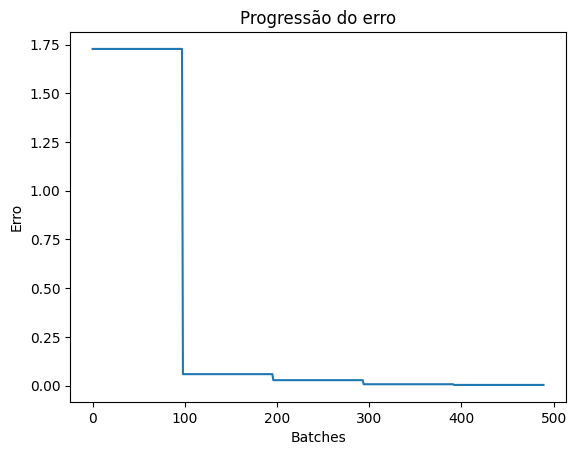

In [41]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

In [42]:
modelo.to_disk("modelo")

# Teste

In [43]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

### Texto positivo

In [44]:
texto_positivo = base_teste['tweet_text'][21]
texto_positivo

'@duda_tn fico feliz sabendo q é recíproco :))'

In [45]:
previsao = modelo_carregado(texto_positivo)
previsao

@duda_tn fico feliz sabendo q é recíproco :))

In [46]:
previsao.cats

{'POSITIVO': 0.021774042397737503, 'NEGATIVO': 0.9782258868217468}

In [47]:
texto_positivo = 'eu gosto muito de você'
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'gosto'

In [48]:
modelo_carregado(texto_positivo).cats

{'POSITIVO': 0.9987525939941406, 'NEGATIVO': 0.0012473980896174908}

### Texto negativo

In [49]:
base_teste['tweet_text'][4000]

'Tô bem triste do filme da Mulan não ter o Mushu :('

In [50]:
texto_negativo = base_teste['tweet_text'][4000]
previsao = modelo_carregado(texto_negativo)
previsao.cats

{'POSITIVO': 0.9857467412948608, 'NEGATIVO': 0.014253324829041958}

# Avaliação do modelo

In [51]:
previsoes = []
for texto in base_teste['tweet_text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [52]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [53]:
respostas_reais = base_teste['sentiment'].values

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.3832

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[ 214, 2286],
       [ 798, 1702]])

<Axes: >

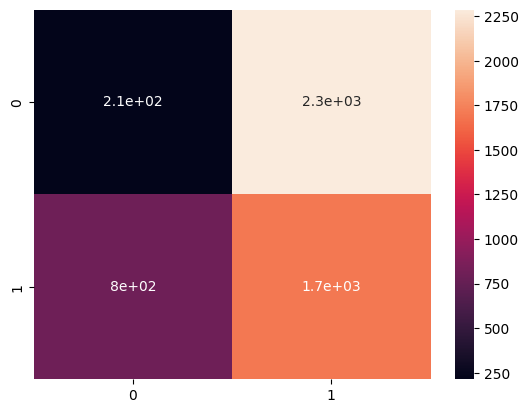

In [56]:
sns.heatmap(cm, annot=True)